## Validación de la regresión

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_original = datasets.load_boston(return_X_y=False)

/home/jose/miniconda3/envs/data/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [85]:
x = pd.DataFrame(df_original.data, columns=df_original.feature_names)
y = pd.DataFrame(df_original.target, columns=['price'])

In [394]:
y.shape

(506, 1)

In [137]:
df = pd.concat((y, x), axis=1)

In [422]:
correlations = df.corr()
correlations.style.background_gradient(cmap='Greens')

,price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
price,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


Variable objetivo: Price

<AxesSubplot:ylabel='Count'>

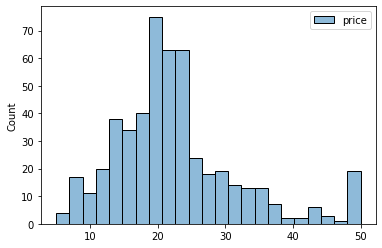

In [138]:
sns.histplot(y)

#### CHAS

<AxesSubplot:>

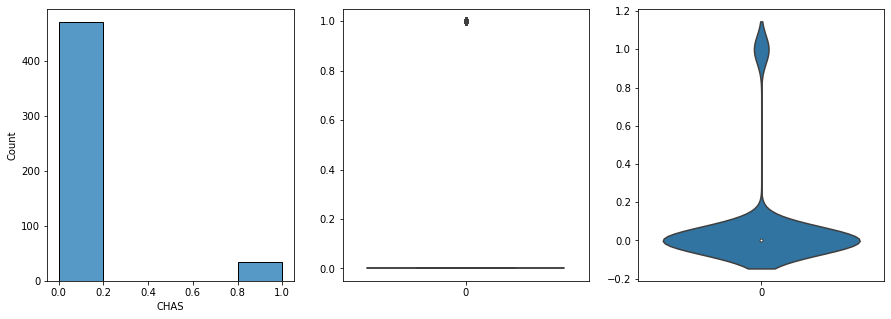

In [139]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.CHAS, bins=5 ,ax=axes[0])
sns.boxplot(data=df.CHAS, ax=axes[1])
sns.violinplot(data=df.CHAS, ax=axes[2])

#### LSTAT

<AxesSubplot:>

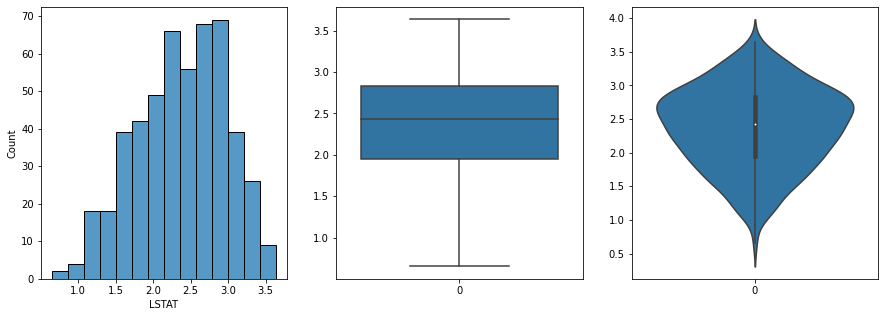

In [146]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.LSTAT, ax=axes[0])
sns.boxplot(data=df.LSTAT, ax=axes[1])
sns.violinplot(data=df.LSTAT, ax=axes[2])

###### Normalizar

In [141]:
df.LSTAT = np.log(df.LSTAT)

###### Analisis outliers

In [145]:
Q1 = df.LSTAT.quantile(0.25)
Q3 = df.LSTAT.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((df.LSTAT < BI) | (df.LSTAT > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  0.0


In [144]:
# Quitar outliers
out = ((df.LSTAT > BI) & (df.LSTAT < BS))
df = df.loc[out]
df.shape

(505, 14)

#### RM

<AxesSubplot:>

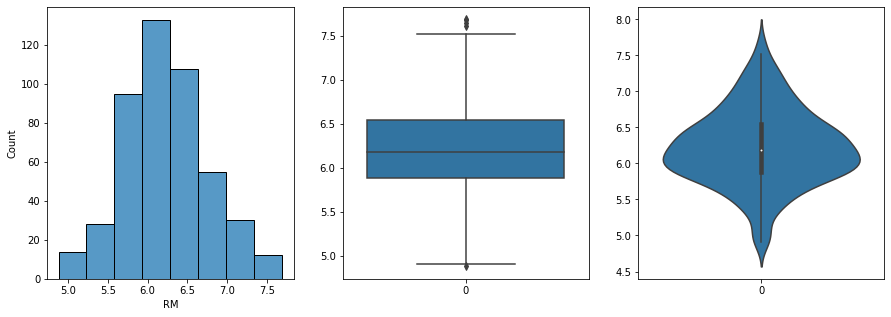

In [153]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.RM, bins=8 ,ax=axes[0])
sns.boxplot(data=df.RM, ax=axes[1])
sns.violinplot(data=df.RM, ax=axes[2])

In [152]:
Q1 = df.RM.quantile(0.25)
Q3 = df.RM.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((df.RM < BI) | (df.RM > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  1.0526315789473684


In [151]:
# Quitar outliers
out = ((df.RM >= BI) & (df.RM <= BS))
df = df.loc[out]
df.shape
#si después de quitar ouliers se generan nuevos. volver a hacer un filtro?

(475, 14)

#### PTRATIO

<AxesSubplot:>

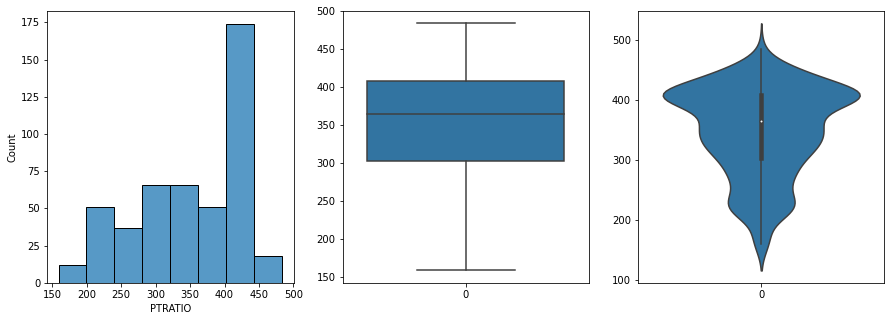

In [157]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.PTRATIO, bins=8, ax=axes[0])
sns.boxplot(data=df.PTRATIO, ax=axes[1])
sns.violinplot(data=df.PTRATIO, ax=axes[2])

In [158]:
Q1 = df.PTRATIO.quantile(0.25)
Q3 = df.PTRATIO.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((df.PTRATIO < BI) | (df.PTRATIO > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  0.0


#### Normalizar

In [156]:
df.PTRATIO = df.PTRATIO**2

In [577]:
# Quitar outliers
out = ((df.PTRATIO >= BI) & (df.PTRATIO <= BS))
df = df.loc[out]
df.shape

(460, 14)

#### TAX

<AxesSubplot:>

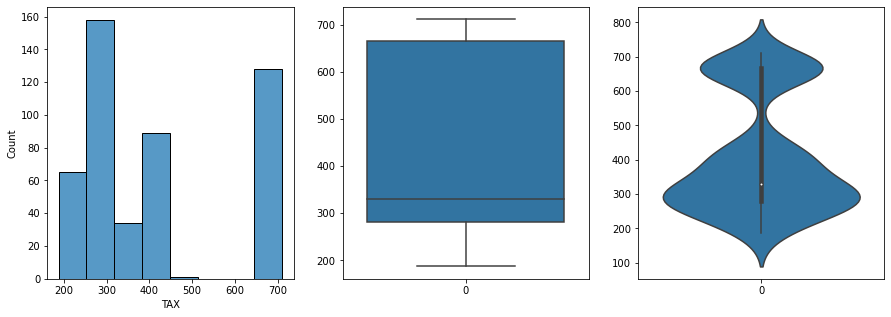

In [159]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.TAX, bins=8, ax=axes[0])
sns.boxplot(data=df.TAX, ax=axes[1])
sns.violinplot(data=df.TAX, ax=axes[2])

In [160]:
Q1 = df.TAX.quantile(0.25)
Q3 = df.TAX.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((df.TAX < BI) | (df.TAX > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  0.0


#### NOX

<AxesSubplot:>

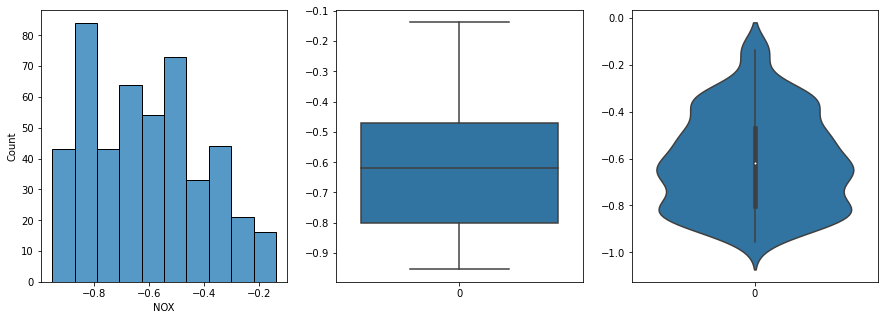

In [163]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.NOX, bins=10 ,ax=axes[0])
sns.boxplot(data=df.NOX, ax=axes[1])
sns.violinplot(data=df.NOX, ax=axes[2])

###### Normalizar

In [162]:
df.NOX = np.log(df.NOX)

In [164]:
Q1 = df.NOX.quantile(0.25)
Q3 = df.NOX.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((df.NOX < BI) | (df.NOX > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  0.0


#### CRIM

<AxesSubplot:>

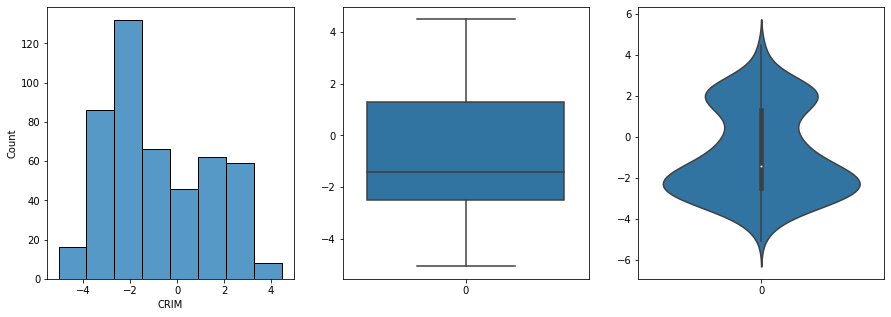

In [167]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.CRIM, bins=8 ,ax=axes[0])
sns.boxplot(data=df.CRIM, ax=axes[1])
sns.violinplot(data=df.CRIM, ax=axes[2])

In [166]:
df.CRIM = np.log(df.CRIM)

In [168]:
Q1 = df.CRIM.quantile(0.25)
Q3 = df.CRIM.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR

BS = Q3 + 1.5*IQR
out = ((df.CRIM < BI) | (df.CRIM > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  0.0


In [59]:
#no utilizar por el momento, cada vez que saco outliers se generan más
# Quitar outliers
out = ((df.CRIM >= BI) & (df.CRIM <= BS))
df = df.loc[out]
df.shape

(440, 14)

#### RAD

<AxesSubplot:>

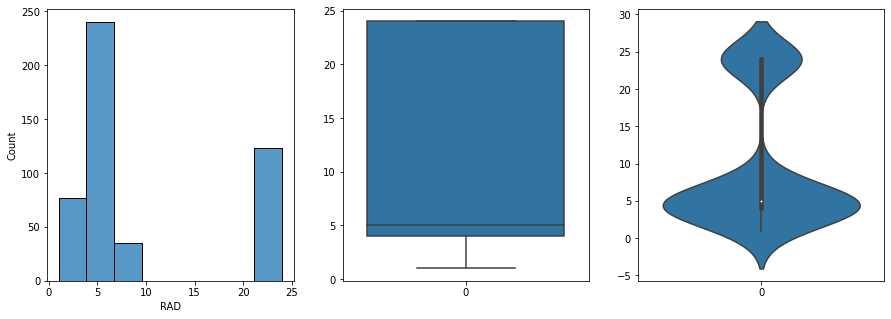

In [169]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.RAD, bins=8, ax=axes[0])
sns.boxplot(data=df.RAD, ax=axes[1])
sns.violinplot(data=df.RAD, ax=axes[2])

In [69]:
df.RAD.value_counts()

5.0     115
4.0     110
24.0     66
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

#### ZN (Solucionar problema de log(0) = -inf)

<AxesSubplot:>

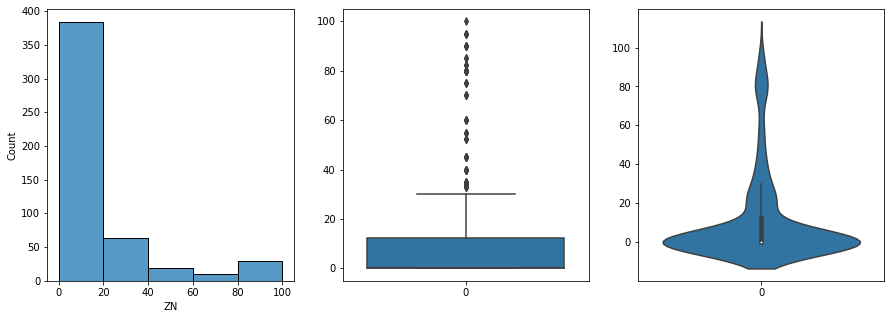

In [122]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.ZN, bins=5 ,ax=axes[0])
sns.boxplot(data=df.ZN, ax=axes[1])
sns.violinplot(data=df.ZN, ax=axes[2])

In [118]:
#df.ZN = 2**df.ZN

In [123]:
df.ZN.value_counts()

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [96]:
Q1 = df.ZN.quantile(0.25)
Q3 = df.ZN.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((df.ZN < BI) | (df.ZN > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  0.0


/home/jose/miniconda3/envs/data/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [ ]:
#No tener en cuenta por demasiados outliers
# Quitar outliers
out = ((df.ZN >= BI) & (df.ZN <= BS))
df = df.loc[out]
df.shape

#### B (problemas para normalizar)

<AxesSubplot:>

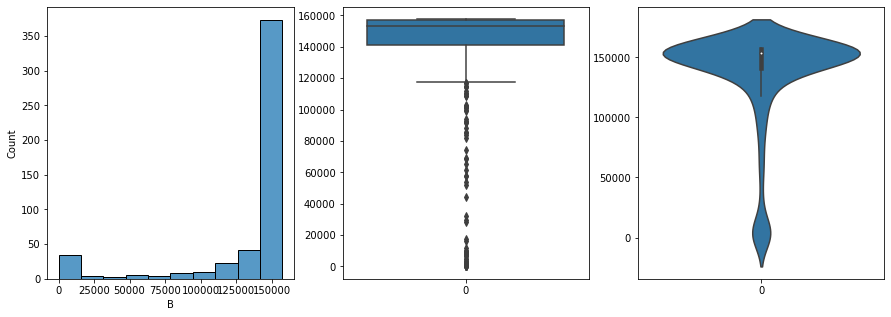

In [130]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.B, bins=10, ax=axes[0])
sns.boxplot(data=df.B, ax=axes[1])
sns.violinplot(data=df.B, ax=axes[2])

In [129]:
df.B = df.B**2

In [131]:
Q1 = df.B.quantile(0.25)
Q3 = df.B.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((df.B < BI) | (x.B > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  14.82213438735178


In [32]:
# Quitar outliers
#no utilizar por la cantidad de outliers
out = ((df.B >= BI) & (df.B <= BS))
df = df.loc[out]
df.shape

(8, 13)

#### DIS

<AxesSubplot:>

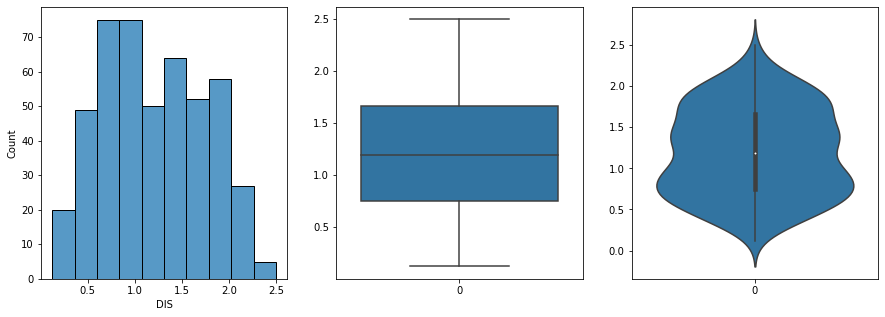

In [173]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.DIS, bins=10 ,ax=axes[0])
sns.boxplot(data=df.DIS, ax=axes[1])
sns.violinplot(data=df.DIS, ax=axes[2])

###### Normalizar

In [172]:
df.DIS = np.log(df.DIS)

In [174]:
Q1 = df.DIS.quantile(0.25)
Q3 = df.DIS.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((df.DIS < BI) | (df.DIS > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  0.0


In [587]:
out = ((df.DIS >= BI) & (df.DIS <= BS))
df = df.loc[out]
df.shape

(455, 14)

#### 1_Análisis sin otulaiers de LSTAT, RM, PTRATIO, TAX, NOX, RAD, DIS, CRIM

In [49]:
x.shape

(455, 13)

In [184]:
x = df[['LSTAT', 'RM', 'PTRATIO', 'TAX', 'NOX', 'RAD', 'DIS', 'CRIM']]
y = df.price

In [475]:
df.price

0      24.0
1      21.6
2      34.7
3      33.4
4       NaN
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 458, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

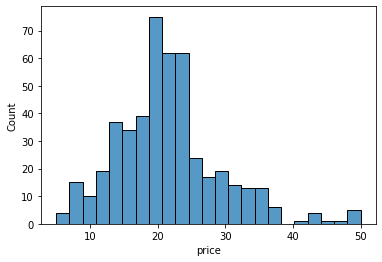

In [180]:
sns.histplot(y)

In [181]:
df.price.mean(), df.price.median()

(20.678587196468005, 20.6)

In [185]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((df.price < BI) | (df.price > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  1.3245033112582782


In [178]:
out = ((df.price >= BI) & (df.price <= BS))
df = df.loc[out]

#### NORMALIZAR FEATURES

In [186]:
x_columns = x.columns

In [187]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=x_columns)

#### Análisis de variables, no se tendrán en cuenta las variables INDUS Y AGE por p>|t| > 0.05

Entrenar modelo

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape

((362, 8), (362,))

In [362]:
y_train.values

array([14.1, 29. , 31.6, 28.1,  nan, 15.6, 17.5, 19.4, 19.5, 22.5, 14.5,
       23.9, 24.1, 20.6, 24.4, 19.3, 20.6, 32.2, 23.1,  nan, 19.7, 20.7,
       23.3, 19.5, 19.4, 28.7, 20.4, 19.3, 19.1, 20.5, 15.4, 24.6, 23.1,
       23.2, 25. , 24.5, 33.4, 15.6, 18.7, 18.8, 25. , 24.5, 21. , 13.1,
       24.4, 16.6, 27.1, 19.9, 21.7, 21.1, 16.7, 22. , 21.2,  7.2, 19. ,
       25.2, 10.4,  9.7,  8.3, 16.7, 34.9, 13.5, 15.6, 13.9, 33.2, 11.7,
       20.6, 22.8, 27.5, 14.6, 12.5, 17. , 13. , 22.5, 22.9, 12.8, 19.1,
       16.2, 23. , 24.1, 13.8, 18.6, 31.6, 20.3, 21.2, 22.8,  8.4, 13.1,
       17.5,  nan, 21.4, 13.1, 33.1, 20. , 14.4, 15. , 21.5,  7.2, 28.6,
       19.6, 18.7, 35.4,  7.4, 22.9,  nan, 17.7, 27. , 15.3, 26.4,  nan,
       15. , 21.7, 19.5, 23.9, 24.7, 18.5, 23.6, 22. , 26.4, 22.4, 33.4,
       17.2, 31.5, 24.4, 28.7, 23.2, 22.3, 16.8, 15.4, 34.7, 22.9, 16.3,
       20.9, 27.1, 21.4, 10.2, 21.4, 13.8, 20.8,  nan, 29.1, 33.2, 19.3,
       17.4, 14.5, 21. , 15.6, 18.8, 30.5, 23.3,  n

In [189]:
ml = sm.OLS(y_train.values.reshape(-1, 1), sm.add_constant(x_train))
ml_results = ml.fit()
ml_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     137.6
Date:                Mon, 03 Oct 2022   Prob (F-statistic):          1.27e-103
Time:                        11:05:52   Log-Likelihood:                -924.68
No. Observations:                 362   AIC:                             1867.
Df Residuals:                     353   BIC:                             1902.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1642      1.965     18.917      0.000      33.300      41.028
LSTAT        -16.6763      1.538    -10.841      0.000     -19.702     -13.651
RM             7.8276      1.211      6.462      0.000       5.445      10.210
PTRATIO       -5.5747      0.867     -6.428      0.000      -7.280      -3.869
TAX           -6.0895      1.327     -4.589      0.000      -8.699      -3.480
NOX           -2.5509      1.602     -1.592      0.112      -5.702       0.600
RAD            4.1980      1.303      3.223      0.001       1.636       6.760
DIS           -4.7605      1.524     -3.123      0.002      -7.758      -1.763
CRIM          -4.9978      2.067     -2.418      0.016      -9.063      -0.933
==============================================================================
Omnibus:                        6.260   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.230
Skew:                           0.259   Prob(JB):                       0.0444
Kurtosis:                       3.381   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
# Valores Ajustados
fitted_values = ml_results.fittedvalues

# Valores residuales
residuals = ml_results.resid

#residuales estandarizados
lm_resid_stand = ml_results.get_influence().resid_studentized_internal

#raiz de los residuales normalizados absolutos
lm_resid_norm_abs_sqrt = np.sqrt(np.abs(lm_resid_stand))

#residuales absolutos
lm_resid_abs = np.abs(residuals)

In [191]:
sns.set(rc = {'figure.figsize':(15,8)})

In [192]:
y_pred = ml_results.predict(sm.add_constant(x_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 8.27


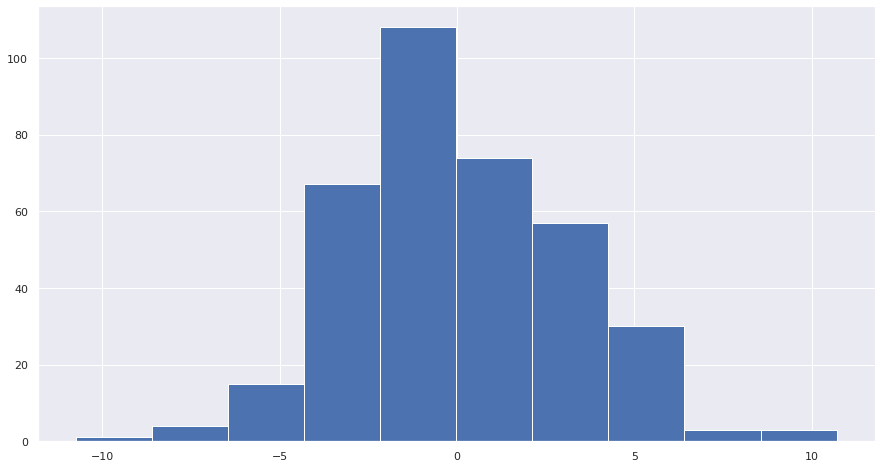

In [193]:
# Residuales
plt.hist(ml_results.resid)
plt.show()

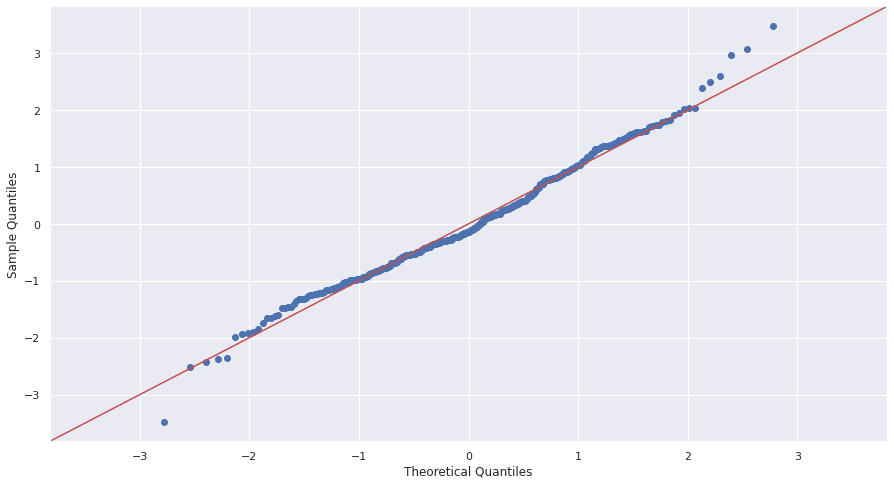

In [194]:
def grafico_qqplot():
    fig = sm.qqplot(lm_resid_stand,line='45')
    plt.show()

grafico_qqplot()

## Residuales vs ajustados

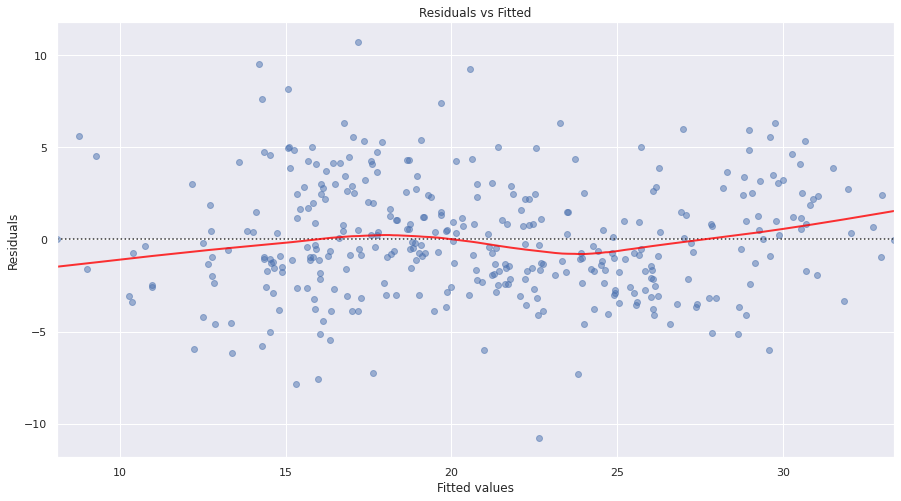

In [195]:
def residuales_vs_ajustados():
    plot = sns.residplot(x=fitted_values, y=residuals, lowess=True,
                         scatter_kws={'alpha': 0.5},
                         line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

    # Titel and labels
    plot.set_title('Residuals vs Fitted')
    plot.set_xlabel('Fitted values')
    plot.set_ylabel('Residuals')
residuales_vs_ajustados()

## Scale Location

/home/jose/miniconda3/envs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 70

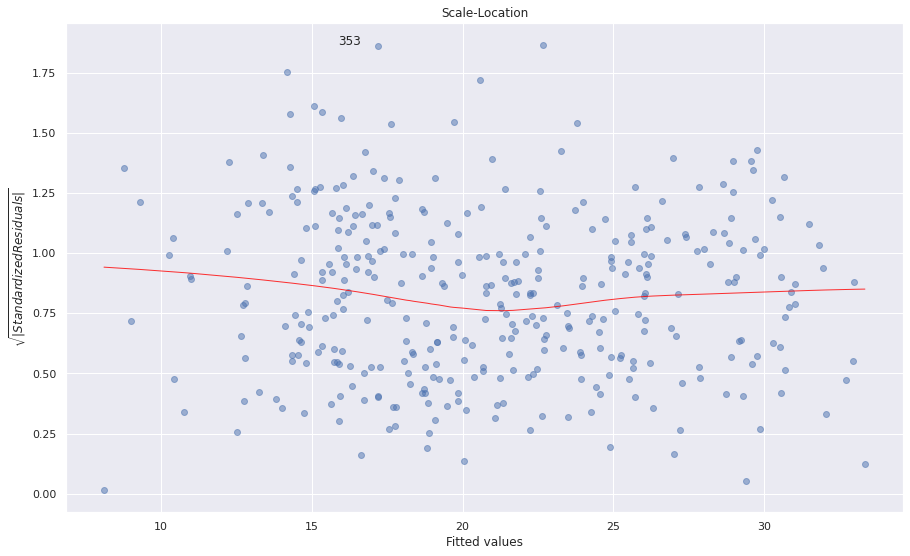

In [196]:
def scale_location():
    plot_lm_3 = plt.figure(figsize=(15,9))
    plt.scatter(fitted_values, lm_resid_norm_abs_sqrt, alpha=0.5)
    sns.regplot(fitted_values, lm_resid_norm_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(lm_resid_norm_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_sq_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                   xy=(fitted_values[i],
                                   lm_resid_norm_abs_sqrt[i]))
    plt.show()
scale_location()